### Lattice Surgery Schedule

In [4]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

from benchmarks.cirq_to_ls import cirq_to_ls
from swiper.simulator import DecodingSimulator
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
import matplotlib.pyplot as plt
import swiper.plot as plotter
import subprocess
from benchmarks.benchmark_circuits import QROM, CarlemanEncoding, ElectronicStructure, FermiHubbardEncoding, HeisenbergEncoding, ChemicalHamiltonianEncoding, RegularT, RandomT, Memory, MSD15To1, QASMBenchmark, Toffoli, RZ
from pyLIQTR.clam.lattice_definitions import KagomeLattice, TriangularLattice
import pickle as pkl

In [7]:
benchmark_param_combos = [
    # (Memory, (10000,)),
    # (MSD15To1, ()),  
    # (Toffoli, ()),
    # (RegularT, (1000, 0)),
    # (RandomT, (1000, 200, 0)),
    # (RandomT, (10000, 200, 0)),
    # (QROM, (None, 15, 15)),
    # (CarlemanEncoding, (2, 4)),
    # (ElectronicStructure, ()),
    #(FermiHubbardEncoding, ((2,2),)),
    #(FermiHubbardEncoding, ((4,4),)),
    #(FermiHubbardEncoding, ((2,2,3), KagomeLattice, 'Kagome')),
    (FermiHubbardEncoding, ((2,3,3), KagomeLattice, 'Kagome')),
    # (HeisenbergEncoding, (3,)),
    # (HeisenbergEncoding, (5,)),
    # #(HeisenbergEncoding, (10,)),
    # #(ChemicalHamiltonianEncoding, (112,)), # H2O
    # (ChemicalHamiltonianEncoding, (140,)), # H2
    #(ChemicalHamiltonianEncoding, (146,)),  # LiH
]

In [3]:
# RandomT schedules
for i in range(20):
    b = RandomT(1000, 200, i)
    schedule = b.get_schedule()
    name = b.name()
    savepath = f'benchmarks/cached_schedules/random_t/{name}.lss'
    with open(savepath, 'w') as f:
        f.write(str(schedule))

In [4]:
# Rz Schedules
for prec in [1e-5, 1e-10, 1e-15, 1e-20]:
    b = RZ(prec, 1)
    schedule = b.get_schedule()
    name = b.name()
    savepath = f'benchmarks/cached_schedules/{name}.lss'
    with open(savepath, 'w') as f:
        f.write(str(schedule))
for seq in [10, 100]:
    b = RZ(1e-10, seq)
    schedule = b.get_schedule()
    name = b.name()
    savepath = f'benchmarks/cached_schedules/{name}.lss'
    with open(savepath, 'w') as f:
        f.write(str(schedule))

LS Instructions read  710
Slices 358
Made patch computation. Took 0.102456s.
LS Instructions read  1406
Slices 706
Made patch computation. Took 0.203941s.
LS Instructions read  2090
Slices 1048
Made patch computation. Took 0.330319s.
LS Instructions read  2846
Slices 1426
Made patch computation. Took 0.409963s.
LS Instructions read  14102
Slices 7064
Made patch computation. Took 2.08912s.
LS Instructions read  140038
Slices 70128
Made patch computation. Took 20.0969s.


In [8]:
for benchmark, params in benchmark_param_combos:
    print(f'Generating benchmark {benchmark.__name__} with params {params}')
    b = benchmark(*params)
    schedule = b.get_schedule()
    print(f'\tInstruction count: {len(schedule)}')
    name = b.name()
    savepath = f'benchmarks/cached_schedules/{name}.lss'
    print(f'\tSaving to {savepath}...')
    with open(savepath, 'w') as f:
        f.write(str(schedule))
    print(f'\tFile size: {os.path.getsize(savepath) / 2**20: 0.2f} MB')

Generating benchmark FermiHubbardEncoding with params ((2, 3, 3), <class 'pyLIQTR.clam.lattice_definitions.KagomeLattice'>, 'Kagome')
LS Instructions read  399187
Slices 139201
Made patch computation. Took 357.349s.
	Instruction count: 389840
	Saving to benchmarks/cached_schedules/fermi_hubbard_2_3_Kagome.lss...
	File size:  29.70 MB


In [6]:
# MQT benchmarks (QPE and Shor)

for file in os.listdir('benchmarks/data/qasm/'):
    print(file, end='...')
    b = QASMBenchmark(f'benchmarks/data/qasm/{file}')
    schedule = b.get_schedule()
    print(f'\tInstruction count: {len(schedule)}')
    name = b.name()
    savepath = f'benchmarks/cached_schedules/{name}.lss'
    print(f'\tSaving to {savepath}...')
    with open(savepath, 'w') as f:
        f.write(str(schedule))
    print(f'\tFile size: {os.path.getsize(savepath) / 2**20: 0.2f} MB')

adder_n10.qasm...LS Instructions read  787
Slices 211
Made patch computation. Took 0.224346s.
	Instruction count: 887
	Saving to benchmarks/cached_schedules/adder_n10.lss...
	File size:  0.06 MB
adder_n4.qasm...LS Instructions read  132
Slices 27
Made patch computation. Took 0.0173442s.
	Instruction count: 136
	Saving to benchmarks/cached_schedules/adder_n4.lss...
	File size:  0.01 MB
LS Instructions read  34240nt: 1207
Slices 11041
Made patch computation. Took 7.62109s.
	Instruction count: 26601
	Saving to benchmarks/cached_schedules/qpeexact_5.lss...
	File size:  1.95 MB
adder_n18.qasm...LS Instructions read  1552
Slices 316
Made patch computation. Took 0.502436s.
	Instruction count: 2338
	Saving to benchmarks/cached_schedules/adder_n18.lss...
	File size:  0.15 MB
LS Instructions read  761816nt: 1
Slices 77257
Made patch computation. Took 151.416s.
	Instruction count: 675288
	Saving to benchmarks/cached_schedules/qpeexact_20.lss...
	File size:  51.94 MB
LS Instructions read  1398102


In [7]:
ls_schedule = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/toffoli.lss').read())

In [8]:
d=7
decoding_time = 0
speculation_time = 0
speculation_accuracy = 1

simulator = DecodingSimulator()

In [9]:
#%%prun
success, sim_params, device_data, window_data, decoding_data = simulator.run(
    schedule=ls_schedule,
    distance=d,
    decoding_latency_fn=lambda _: decoding_time,
    speculation_mode='integrated',
    scheduling_method='sliding',
    max_parallel_processes=None,
    progress_bar=True,
    save_animation_frames=False
)

Surface code rounds: 228it [00:00, 8921.89it/s]


<Axes3D: >

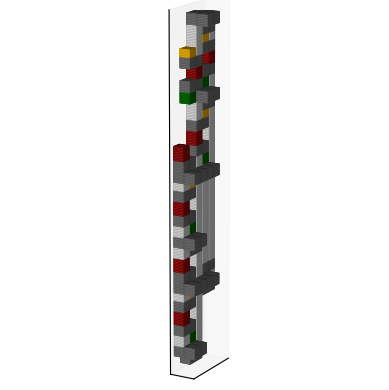

In [10]:
plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True)